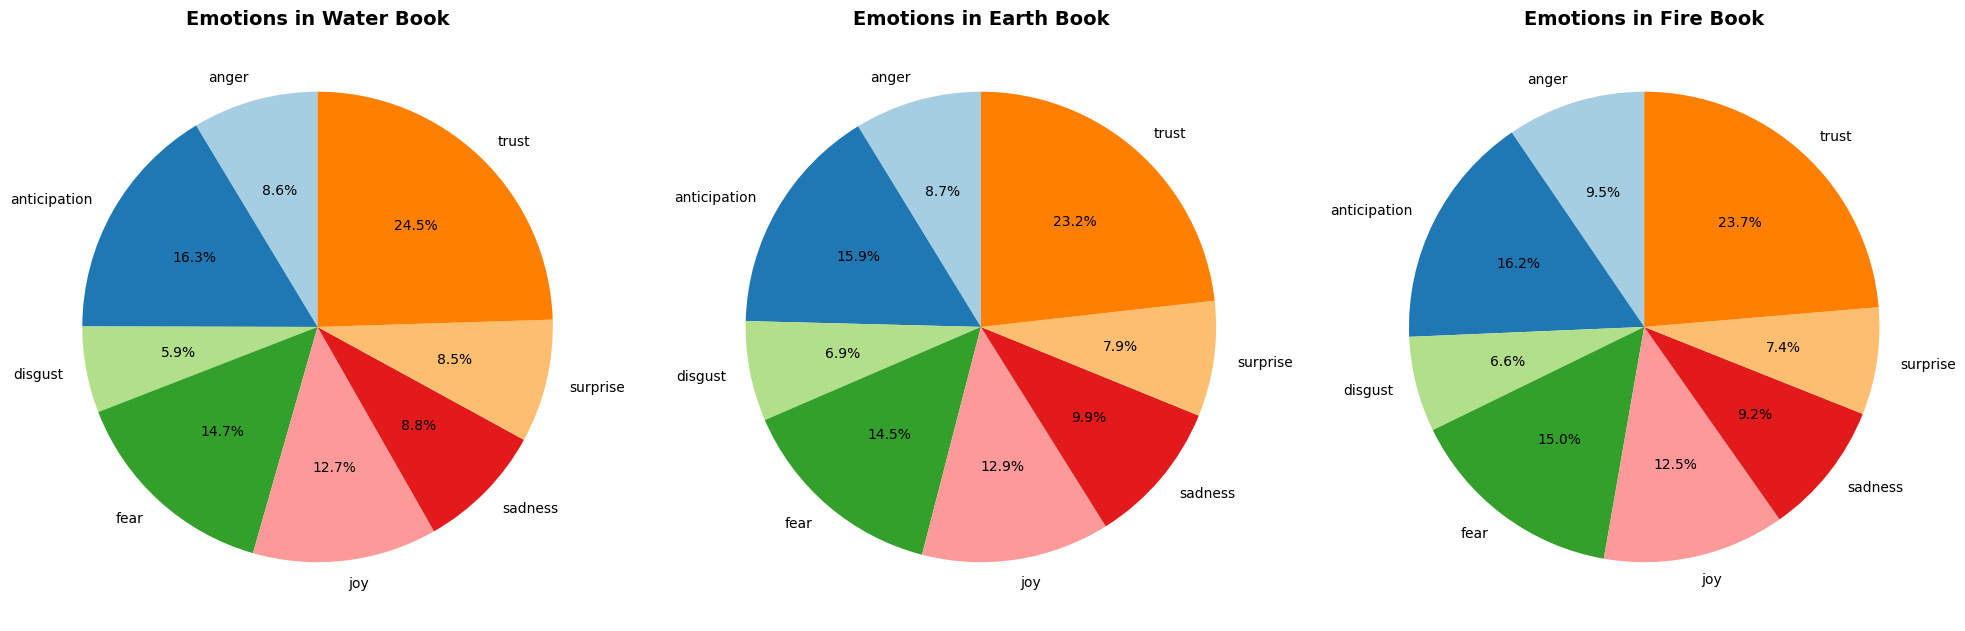

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Load episode ratings and emotions
ratings_best = pd.read_csv('top_10_best_rated_episodes.csv')
ratings_worst = pd.read_csv('top_10_worst_rated_episodes.csv')
episode_emotions = pd.read_csv('episode_emotions.csv')

# Define the desired order of books
book_order = ['Water', 'Earth', 'Fire']

# Aggregate emotions by book and ensure order
emotions_by_book = (
    episode_emotions.groupby('book')[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']]
    .sum()
    .reindex(book_order)
)

# Plot pie charts for each book
fig, axes = plt.subplots(1, len(book_order), figsize=(20, 8))

for i, (book, emotions) in enumerate(emotions_by_book.iterrows()):
    axes[i].pie(
        emotions,
        labels=emotions.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors  # Use a colormap for consistent coloring
    )
    axes[i].set_title(f"Emotions in {book} Book", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()





### **Water Book (Book 1)**
- **Trust (24.5%)**:
   - Trust remains the dominant emotion in the Water Book, as the series introduces the main characters and focuses on building relationships. Team Avatar’s bond begins to take shape, and trust extends to allies like **Bumi** and **Teo’s father**, laying the foundation for future alliances.
- **Anticipation (16.3%)**:
   - High anticipation aligns with the exploratory and episodic nature of this season. Each episode brings new challenges and discoveries, from mastering waterbending to evading Fire Nation attacks.
- **Fear (14.7%)**:
   - Fear captures the ongoing threat posed by the Fire Nation, especially Zuko’s relentless pursuit of Aang. The stakes escalate in episodes like the siege of the Northern Water Tribe, where the looming danger becomes tangible.
- **Low Disgust and Anger**:
   - **Disgust (5.9%)** is relatively low, reflecting the season’s lighter tone and focus on camaraderie. **Anger (8.6%)** is also subdued, as most conflicts revolve around external threats rather than internal struggles.
- **Sadness and Joy (Lower)**:
   - Sadness and joy are present but not as pronounced as in later seasons. Emotional depth is still developing as the characters form their connections and adapt to their roles.


### **Earth Book (Book 2)**
- **Peaks in Disgust, Sadness, and Joy**:
   - **Disgust (6.9%)** peaks here, driven by morally complex storylines like **Long Feng’s manipulation**, the Dai Li’s control over Ba Sing Se, and moments of betrayal. These darker themes introduce an unsettling dimension to the narrative.
   - **Sadness (12.9%)** also reaches its highest point, with episodes like *Appa’s Lost Days* and the fall of Ba Sing Se. These moments of loss and betrayal weigh heavily on Team Avatar and the audience.
   - **Joy (12.9%)** peaks as well, balancing the darker moments with uplifting victories like **Toph joining the team** and lighter comedic episodes that maintain the show’s charm.
- **Trust (23.2%)**:
   - Trust remains strong as Team Avatar expands, welcoming Toph and forging alliances in the Earth Kingdom. However, it’s also tested, as seen with betrayals by **Long Feng** and others.
- **Rising Anger (8.7%)**:
   - Anger begins to rise in the Earth Book, fueled by injustices like **Appa’s capture**, **Ba Sing Se’s corruption**, and **Azula’s manipulations**. These elements reflect the growing stakes and frustrations of the characters.
- **Fear and Anticipation (Balanced)**:
   - Fear (14.5%) and anticipation (15.9%) remain steady, capturing the tension of Ba Sing Se’s intrigue and the buildup to the Day of Black Sun.

### **Fire Book (Book 3)**
- **Trust (23.7%)**:
   - Trust remains a cornerstone, reflecting the solidified bonds within Team Avatar and Zuko’s integration into the group. The Fire Book’s resolution relies on trust, especially in alliances like the **Order of the White Lotus** and Aang’s reliance on Roku and other past Avatars.
- **Fear (15.0%) and Anticipation (16.2%)**:
   - These emotions peak as the series approaches its climax. Episodes like *The Day of Black Sun* and *Sozin’s Comet* are filled with tension, as characters prepare for and engage in the final battle against the Fire Nation.
- **Anger Peaks (9.5%)**:
   - Anger reaches its highest level in the Fire Book, driven by intense personal and external conflicts. Azula’s descent into madness, Zuko’s confrontation with his father, and the stakes of the final battle contribute to this emotional crescendo.
- **Lower Disgust and Sadness**:
   - Disgust (6.6%) and sadness (9.2%) decline as the series focuses on action and resolution. While moments of loss are present (e.g., Azula’s mental breakdown), they’re tempered by triumphs and reconciliations.
- **Joy Stabilizes (12.5%)**:
   - Joy remains significant, with uplifting moments like Zuko’s redemption, the final victory over Ozai, and Team Avatar’s reunion at the end of the series.

### **Key Observations Across Seasons**
1. **Disgust, Sadness, and Joy Peak in the Earth Book**:
   - The Earth Book’s complex narrative is reflected in these emotional peaks. The balance of darker elements (disgust, sadness) with moments of joy captures the series’ shift toward deeper emotional stakes.
   - Episodes like *Appa’s Lost Days* and *Lake Laogai* exemplify this balance, with heartbreaking moments offset by victories and character growth.

2. **Anger Rises Across the Seasons**:
   - Anger steadily increases, reflecting the characters’ growing frustrations and conflicts. By the Fire Book, it becomes a dominant force, mirroring the intensity of personal and external struggles as the series approaches its climax.

3. **Fear and Anticipation Drive the Narrative**:
   - These emotions remain strong throughout all seasons, showcasing the tension and excitement inherent in the story’s progression. From the early threat of the Fire Nation to the final battle against Ozai, fear and anticipation keep the stakes high.

4. **Trust as the Anchor**:
   - Trust is the most consistent emotion across all seasons, highlighting the centrality of relationships and alliances. From Team Avatar’s bond to Zuko’s redemption, trust is the foundation of the series’ emotional resonance.

### **Conclusion**
The evolving emotional landscape of *Avatar: The Last Airbender* is a testament to its narrative depth and character growth. The Water Book lays the groundwork with trust and anticipation, the Earth Book explores emotional complexity with peaks in disgust, sadness, and joy, and the Fire Book delivers an action-packed resolution with rising anger and climactic fear. These emotional shifts mirror the show’s progression from lighthearted exploration to high-stakes resolution, making it a truly unforgettable journey.

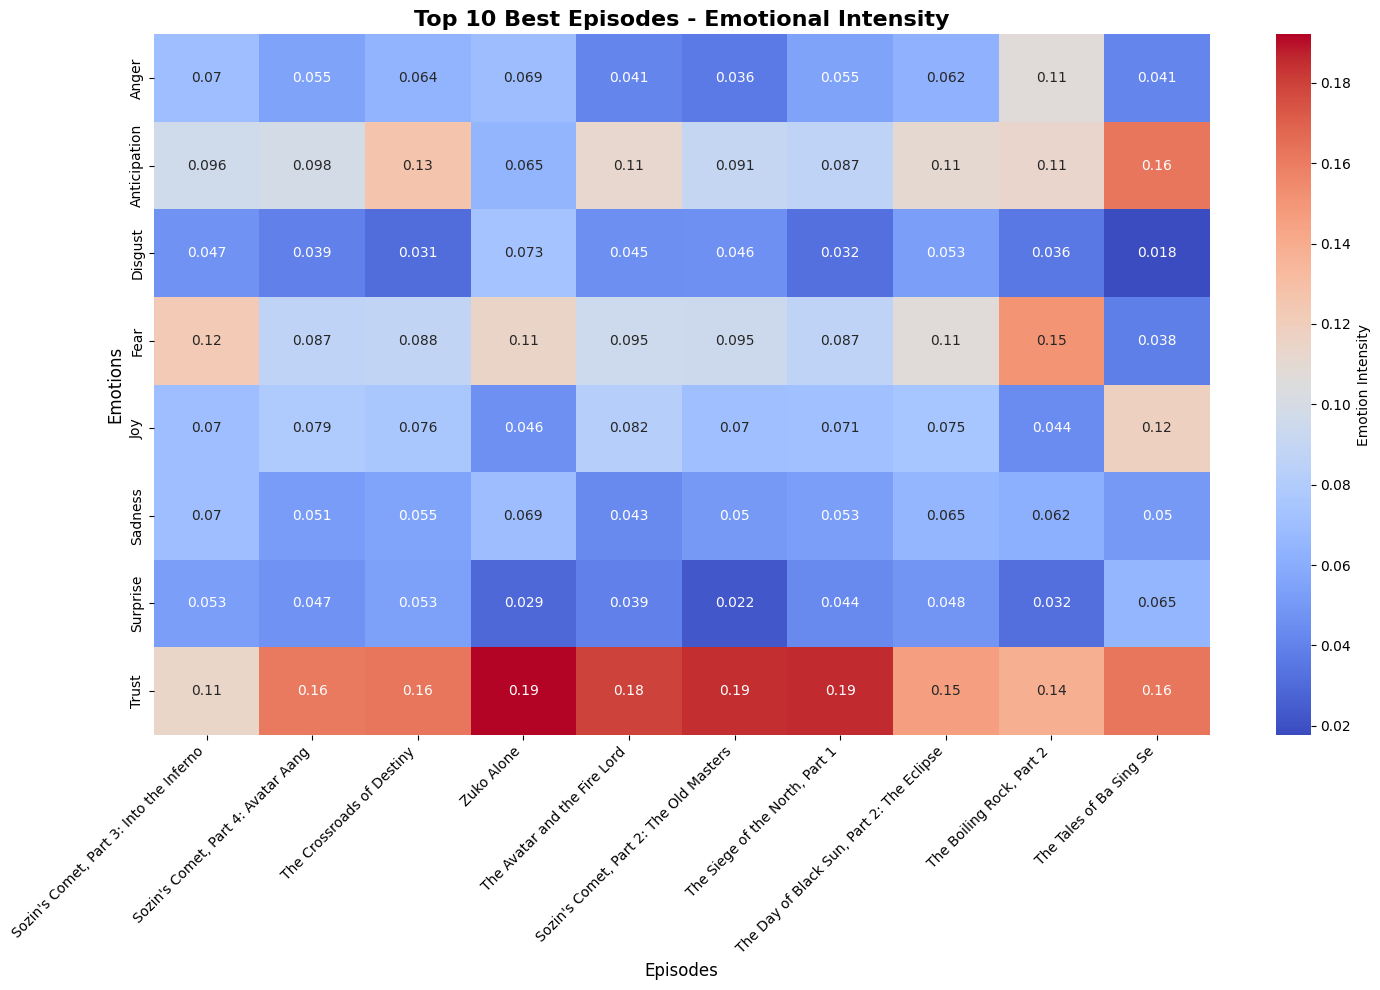

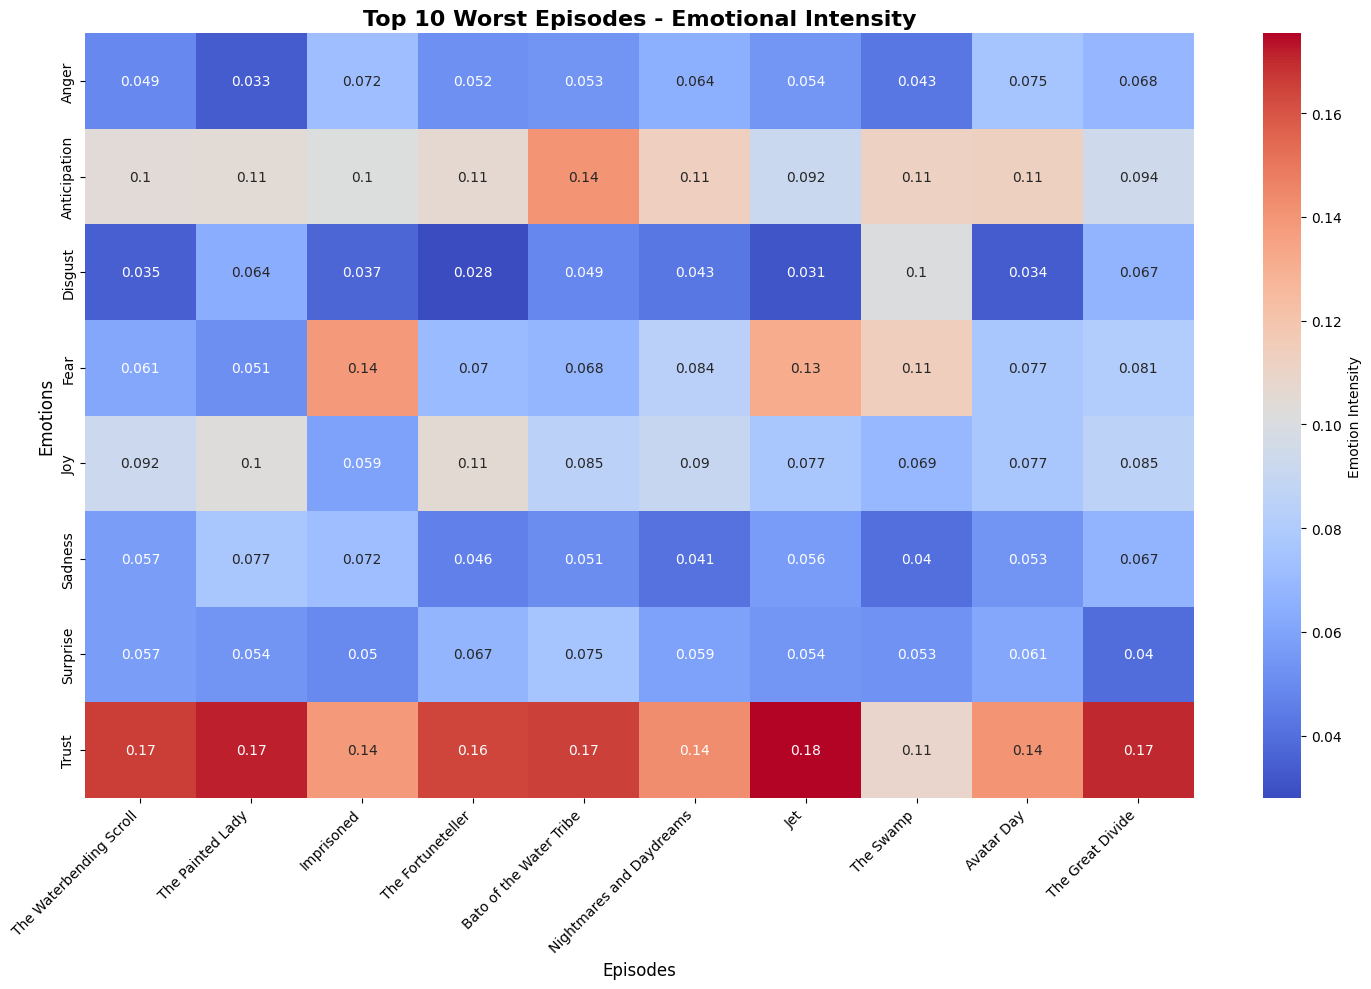

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine the rated episodes into one DataFrame
rated_episodes = pd.concat([
    ratings_best.assign(group='Top 10 Best'),
    ratings_worst.assign(group='Top 10 Worst')
], ignore_index=True)

# Merge emotions with rated episodes
rated_emotions = rated_episodes.merge(
    episode_emotions,
    left_on=['book', 'chapter'],
    right_on=['book', 'chapter']
)

import seaborn as sns

# Plot heatmaps for each rated episode group
for group, group_data in rated_emotions.groupby('group'):
    plt.figure(figsize=(15, 10))
    sns.heatmap(
        group_data[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']].T,
        annot=True,  # Show values on the heatmap
        cmap='coolwarm',  # Color scheme
        xticklabels=group_data['chapter'],  # Use chapters as X-axis labels
        yticklabels=['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust'],  # Emotion labels
        cbar_kws={'label': 'Emotion Intensity'}
    )
    plt.title(f"{group} Episodes - Emotional Intensity", fontsize=16, fontweight="bold")
    plt.xlabel("Episodes", fontsize=12)
    plt.ylabel("Emotions", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()



### **Best Episodes: Emotional Intensity**
The heatmap for the top 10 best episodes reveals a balance of emotions, with notable peaks in specific categories. Here's what stands out:

1. **High Trust Levels**:  
   - Episodes like *"Zuko Alone"* and *"The Avatar and the Fire Lord"* display the highest intensity of trust. This makes sense, as these episodes explore deeply personal and transformative moments for characters, such as Zuko’s reflection on his past and his lineage, and Aang’s connection to Roku. Trust is a core theme here—whether it’s trust in oneself, others, or the larger responsibilities they carry.

2. **Anticipation and Fear**:  
   - Episodes like *"Sozin’s Comet, Part 4: Avatar Aang"* exhibit high anticipation and fear, which is natural given the stakes in these moments. These emotions reflect the climactic tension as the series reaches its apex, with characters and viewers alike awaiting the outcome of the final battle.
   - Fear is particularly elevated in episodes with personal stakes (*"The Crossroads of Destiny"*) or when characters face moral and existential dilemmas.

3. **Surprise and Sadness**:  
   - *"Zuko Alone"* and *"The Crossroads of Destiny"* both rank high in surprise, showcasing pivotal plot twists or character decisions. These moments add to the emotional weight of the episodes, leaving lasting impressions on the audience.
   - Sadness is subtly present in many top episodes but doesn’t dominate, reflecting the balance *Avatar* strikes between emotional depth and uplifting moments. Episodes like *"The Crossroads of Destiny"* and *"The Avatar and the Fire Lord"* carry this emotional weight through character backstories or sacrifices.

4. **Low Anger and Disgust**:  
   - Interestingly, anger and disgust remain relatively low across the best episodes. This suggests that the most beloved episodes focus more on themes like hope, redemption, and personal growth rather than conflict-driven negativity.

### **Worst Episodes: Emotional Intensity**
The heatmap for the top 10 worst episodes tells a different story, with notable emotional patterns that may explain their weaker reception:

1. **Flat Emotional Range**:  
   - These episodes tend to show lower peaks in emotional intensity across the board. While anticipation and trust are still present, they lack the high spikes seen in the best episodes. This flatness might indicate a lack of compelling stakes or emotional engagement.

2. **Trust Dominance**:  
   - Episodes like *"Jet"* and *"The Great Divide"* show higher trust levels compared to other emotions, but this doesn’t always work in their favor. In these cases, the trust isn’t tied to meaningful emotional payoffs or plot development, which may make these episodes feel less impactful.

3. **Disproportionate Fear and Disgust**:  
   - Episodes like *"The Swamp"* and *"Avatar Day"* exhibit higher levels of disgust and fear, but these emotions aren’t always balanced with moments of hope or joy. For instance, *"The Swamp"* leans heavily on eerie and unsettling elements without providing the narrative depth that would make these emotions meaningful.

4. **Low Joy and Surprise**:  
   - A key weakness of the worst episodes is their limited sense of joy and surprise. Episodes like *"The Great Divide"* lack the humor, character development, or plot twists that make *Avatar* so engaging. Without these elements, they fail to captivate the audience.

5. **Emotional Misdirection**:  
   - In some cases, the emotional tones feel misaligned with the series’ overall strengths. For example, *"Nightmares and Daydreams"* focuses on humor and stress but lacks the emotional resonance seen in the best episodes.


### **Key Comparisons**
- **High Emotional Range in Best Episodes**:  
   - The best episodes succeed because they balance multiple emotions—anticipation, trust, sadness, and surprise—to create a layered experience. They engage viewers with stakes, character growth, and meaningful relationships, leaving a lasting impact.
   - In contrast, the worst episodes often lack this emotional variety, leaning too heavily on a single emotion (e.g., trust or disgust) without the depth or balance to sustain it.

- **Narrative and Emotional Alignment**:  
   - In episodes like *"Sozin’s Comet"* or *"The Crossroads of Destiny,"* the narrative stakes align perfectly with the emotional highs, whether it’s the anticipation of a climactic battle or the tension of a major betrayal. Conversely, episodes like *"Avatar Day"* feel narratively insignificant, and their emotions don’t resonate as strongly.



### **Conclusion**
The heatmaps show that what makes an episode truly memorable isn’t just a strong narrative but a rich and balanced emotional palette. The best episodes of *Avatar: The Last Airbender* excel because they evoke a range of emotions—trust, anticipation, fear, and joy—while grounding them in meaningful character arcs and stakes. On the other hand, the worst episodes falter due to flatter emotional dynamics, misaligned tones, or lack of narrative significance. These insights highlight the show’s mastery of emotional storytelling while also explaining why certain episodes stand out or fall short.

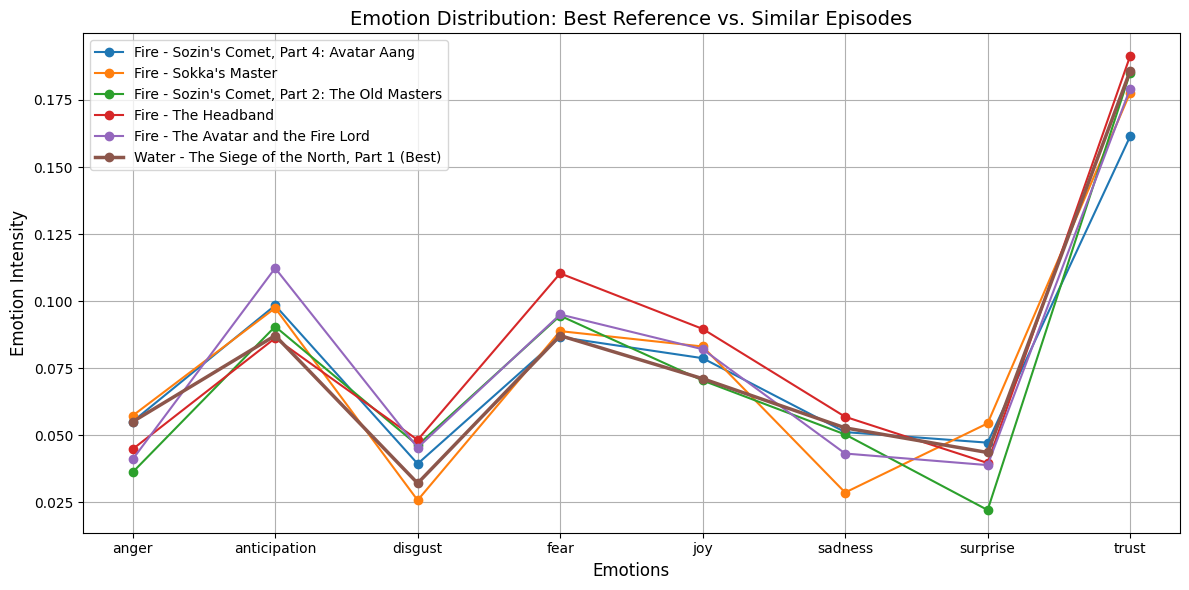

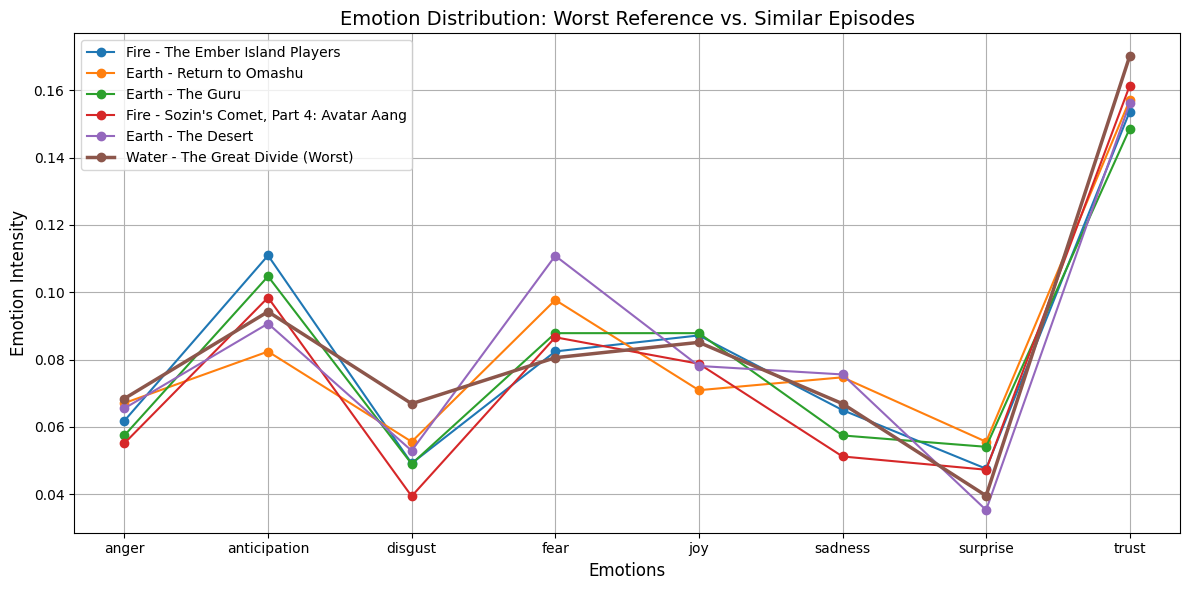

In [93]:
import pandas as pd
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Common emotion columns
EMOTION_COLS = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

def plot_similar_episodes(ratings_df, episode_emotions, reference_label, top_n=10, plot_n=5):
    # Sort ascending for worst, descending for best
    ascending_order = True if reference_label == 'worst' else False

    # Find the reference episode in "Water"
    reference_episode = (
        ratings_df[ratings_df['book'] == 'Water']
        .sort_values(by='imdb_rating', ascending=ascending_order)
        .iloc[0]
    )

    # Extract its emotion distribution
    reference_emotions = (
        episode_emotions[
            (episode_emotions['book'] == 'Water') &
            (episode_emotions['chapter'] == reference_episode['chapter'])
        ][EMOTION_COLS]
        .iloc[0]
    )

    # Compare with episodes in "Earth" and "Fire"
    comparison_df = episode_emotions[episode_emotions['book'].isin(['Earth', 'Fire'])]
    similar_episodes = []
    for _, episode in comparison_df.iterrows():
        episode_vec = episode[EMOTION_COLS]
        distance = euclidean(reference_emotions, episode_vec)
        similar_episodes.append((episode['book'], episode['chapter'], distance))

    # Sort by similarity (smallest distance)
    similar_episodes_df = pd.DataFrame(similar_episodes, columns=['book', 'chapter', 'distance']).sort_values('distance').head(top_n)

    # Plot the reference episode and top similar episodes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot top similar episodes
    for i, (book, chapter, _) in enumerate(similar_episodes_df.iloc[:plot_n].values):
        episode_vec = (
            episode_emotions[
                (episode_emotions['book'] == book) & 
                (episode_emotions['chapter'] == chapter)
            ][EMOTION_COLS].iloc[0]
        )
        ax.plot(EMOTION_COLS, episode_vec, marker='o', label=f"{book} - {chapter}")

    # Plot the reference episode
    ax.plot(
        EMOTION_COLS, reference_emotions, marker='o',
        label=f"Water - {reference_episode['chapter']} ({reference_label.capitalize()})", linewidth=2.5
    )

    # Customize plot
    ax.set_title(f"Emotion Distribution: {reference_label.capitalize()} Reference vs. Similar Episodes", fontsize=14)
    ax.set_ylabel("Emotion Intensity", fontsize=12)
    ax.set_xlabel("Emotions", fontsize=12)
    ax.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Usage:
plot_similar_episodes(ratings_best, episode_emotions, reference_label='best')  # Picks top-rated episode
plot_similar_episodes(ratings_worst, episode_emotions, reference_label='worst') # Picks lowest-rated episode


In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Avatar dataset
df = pd.read_csv('data/avatar.csv', encoding='ISO-8859-1')

# Filter necessary columns and remove duplicates
df = df[['chapter', 'imdb_rating']].drop_duplicates()

# Convert ratings to numeric
df['imdb_rating'] = pd.to_numeric(df['imdb_rating'], errors='coerce')

# Calculate the mean rating across all episodes
average_rating = df['imdb_rating'].mean()

# Filter ratings for "Sokka's Master" and "The Headband"
episodes_of_interest = df[df['chapter'].isin(["Sokka's Master", "The Headband", "The Ember Island Players", "Sozin's Comet, Part 4: Avatar Aang", "Sozin's Comet, Part 2: The Old Masters", "The Great Divide", "Return To Omashu" ,"The Guru", "The Desert", "The Avatar and the Fire Lord"])]

# Print results
print("Average IMDb Rating Across All Episodes:", round(average_rating, 1))
print("\nRatings for Selected Episodes:")
print(episodes_of_interest)


Average IMDb Rating Across All Episodes: 8.7

Ratings for Selected Episodes:
                                      chapter  imdb_rating
2358                         The Great Divide          7.1
6881                               The Desert          8.8
8644                                 The Guru          9.1
9225                             The Headband          8.4
9631                           Sokka's Master          8.8
10074            The Avatar and the Fire Lord          9.5
12479                The Ember Island Players          8.6
12963  Sozin's Comet, Part 2: The Old Masters          9.5
13294      Sozin's Comet, Part 4: Avatar Aang          9.8


### **The Emotional Blueprint Across Beloved and Poorly Rated Episodes**

The emotional distributions of *"The Siege of the North, Part 1"* (best reference) and *"The Great Divide"* (worst reference) provide critical insights into what drives audience engagement—and what doesn’t. Comparing their "similar" episodes reveals that the best-rated episodes share more uniform emotional dynamics, while the worst reference’s emotional signature stands apart, highlighting key differences in storytelling approaches.

#### **1. Emotional Uniformity in Beloved Episodes**
- The episodes similar to *"The Siege of the North, Part 1"*—including *"The Headband"*, *"Sokka’s Master"*, and *"Sozin’s Comet, Part 4"*—show a strikingly **uniform emotional distribution**, with consistently high peaks in **trust**, **anticipation**, and **fear**, complemented by balanced levels of **sadness** and **joy**. This uniformity suggests that the emotional blueprint established in *"The Siege of the North"* is a winning formula for creating impactful and memorable episodes.
  
#### **2. Disjointed Emotional Patterns in Poorly Rated Episodes**
- In contrast, the episodes "similar" to *"The Great Divide"* (e.g., *"Return to Omashu"*, *"The Desert"*, and *"The Guru"*) do not align as closely to its emotional pattern. The worst reference lacks the emotional uniformity seen in *"The Siege of the North"* and its counterparts, making its storytelling feel less cohesive and engaging. This lack of emotional coherence may be why *"The Great Divide"* stands out as the least impactful episode, even within its "similar" set.


### **Shared Emotional Patterns Between Best and Worst**

#### **Sozin’s Comet, Part 4: Avatar Aang**
- Intriguingly, *"Sozin’s Comet, Part 4"* appears as "similar" to both the best (*"The Siege of the North, Part 1"*) and worst (*"The Great Divide"*) references, but its emotional dynamics clearly align more closely with the best reference. This suggests that even high-stakes episodes like *"Sozin’s Comet"* succeed when they replicate the balanced emotional blueprint established by the best-rated episodes. It’s worth noting that:
  - *"Sozin’s Comet"* shares high levels of **trust**, **anticipation**, and **fear** with the best reference.
  - Its appearance in the worst reference set likely reflects *"The Great Divide"*’s brief flirtation with similar emotions (e.g., anticipation and trust), but the lack of emotional depth or resolution in *"The Great Divide"* prevents it from achieving the same resonance.

### **The Unique Isolation of *The Great Divide***
- *"The Great Divide"* is not only the lowest-rated episode of the series (IMDb 7.1, compared to the series average of 8.7), but it also stands out as an emotional outlier. The lack of closely aligned "similar" episodes suggests that the writers learned from this misstep and actively avoided replicating its emotional dynamics in future episodes.

### **What the Writers Likely Learned**
The stark differences between the emotional dynamics of the best and worst references, combined with the greater similarity among the best-aligned episodes, suggest key lessons the writers implemented to improve the series:

1. **Emotional Uniformity and Balance Are Key**:
   - Episodes that balance high levels of trust, anticipation, and fear while incorporating sadness and joy are consistently well-received. This balance creates an engaging narrative arc with emotional payoffs.
   - The disjointed emotional peaks of *"The Great Divide"* likely highlighted the importance of crafting coherent and resonant emotional journeys.

2. **Trust as a Central Theme**:
   - Trust emerges as the foundation of the best-rated episodes, both in interpersonal relationships and in larger thematic arcs. Episodes like *"The Siege of the North"* and *"Sozin’s Comet, Part 4"* ground their high-stakes narratives in trust, making them emotionally satisfying.

3. **Avoiding Low Stakes and Unearned Resolutions**:
   - *"The Great Divide"* suffers from a lack of meaningful stakes and a resolution that feels unearned. The writers likely recognized the need for genuine emotional investment and payoff, as seen in later episodes like *"The Headband"* or *"Sokka’s Master"*, which focus on character growth and meaningful trust.

4. **Scaling Emotional Patterns for Different Stakes**:
   - The best episodes show that the same emotional patterns can work for both large-scale action (*"Sozin’s Comet, Part 4"*) and smaller, character-driven stories (*"The Headband"*). This versatility likely became a cornerstone of the show’s narrative success.


### **Conclusion**
The emotional distributions of *"The Siege of the North, Part 1"* and *"The Great Divide"* reveal how closely aligned emotional patterns underpin the success of *Avatar*’s most beloved episodes, while disjointed patterns contribute to its weakest moments. The fact that no episode closely mirrors *"The Great Divide"* reflects how the writers refined their approach, prioritizing emotional balance and depth in future storytelling. The recurrence of *"Sozin’s Comet, Part 4"* in both best and worst reference sets reinforces that emotional alignment, not stakes alone, determines an episode’s impact. This underscores the value of a thoughtful emotional blueprint in serialized storytelling.